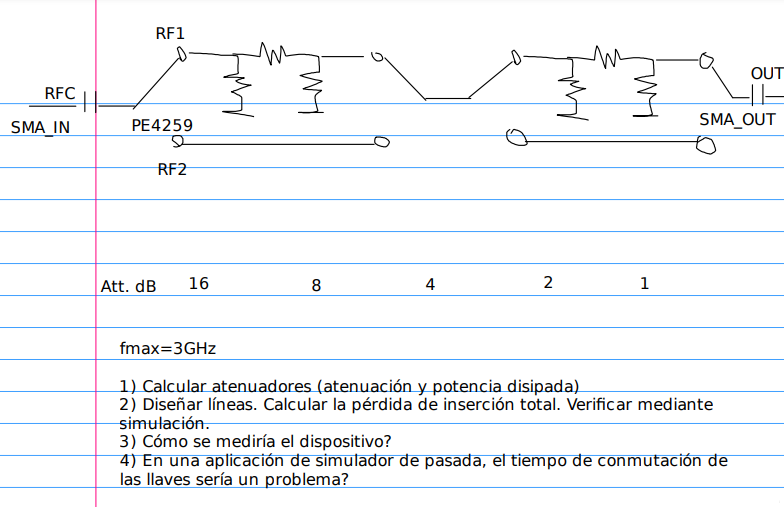

The main idea is to design a variable attenuator using swtiches
In this case we are going to use PI attenuators in cascade, each of them with a different value of attenuation. Then, using switches we can select which ones do we want to use for each case. 
The final attenuator should be able to go from 0 to 30 db in steps of 1db. 

So, we decided to divide the system in 5 attenuators:
- Att A: 16 dB
- Att B:  8 dB
- Att C:  4 dB
- Att D:  2 dB
- Att E:  1 dB



Knowing that:

- XdB = Power Loss
- Nx = Voltage Ratio = Vin/Vout
- Px = Power Ratio = Pin/Pout

-->

XdB = 20 log (Vin/Vout) = 20 log (Nx) = 10 log (Pin/Pout) = 10 log (Px)



In [4]:
ATT_A = 16 
ATT_B =  8 
ATT_C =  4 
ATT_D =  2 
ATT_E =  1 

def calculate_voltage_ratio(power_loss):
    return round(10**(power_loss / 20), 3)


In [5]:
Na = calculate_voltage_ratio(ATT_A)
Nb = calculate_voltage_ratio(ATT_B)
Nc = calculate_voltage_ratio(ATT_C)
Nd = calculate_voltage_ratio(ATT_D)
Ne = calculate_voltage_ratio(ATT_E)

print(f"ATT A: XdB = {ATT_A} , Nx = {Na}")
print(f"ATT A: XdB = {ATT_B} , Nx = {Nb}")
print(f"ATT A: XdB = {ATT_C} , Nx = {Nc}")
print(f"ATT A: XdB = {ATT_D} , Nx = {Nd}")
print(f"ATT A: XdB = {ATT_E} , Nx = {Ne}")


ATT A: XdB = 16 , Nx = 6.31
ATT A: XdB = 8 , Nx = 2.512
ATT A: XdB = 4 , Nx = 1.585
ATT A: XdB = 2 , Nx = 1.259
ATT A: XdB = 1 , Nx = 1.122


We can asume that Zin = Zout = 50 ohms

![Alt text](image-1.png)

Then:
R1 = R2 = 50 * ( (Nx + 1) / (Nx - 1) )
Rs = 50 * ( (Nx^2 -1) / 2Nx )

In [6]:
def calculate_R1(N):
    return round(50*((N + 1)/ (N - 1)), 3)

calculate_R2 = calculate_R1

def calculate_Rs(N):
    return round(50*((N**2 - 1) / (2*N)), 3)


We can proceed now to calculate the values of the resistors for each attenuator 

In [7]:

print("Attenuator A - 16dB:")
R1_A = calculate_R1(Na)
R2_A = calculate_R2(Na)
Rs_A = calculate_Rs(Na)

print(f'R1 = R2 = {R1_A},  Rs = {Rs_A}')
print('____________________________')

print("Attenuator B - 8dB:")
R1_B = calculate_R1(Nb)
R2_B = calculate_R2(Nb)
Rs_B = calculate_Rs(Nb)
print(f'R1 = R2 = {R1_B},  Rs = {Rs_B}')
print('____________________________')

print("Attenuator C - 4dB:")
R1_C = calculate_R1(Nc)
R2_C = calculate_R2(Nc)
Rs_C = calculate_Rs(Nc)
print(f'R1 = R2 = {R1_C},  Rs = {Rs_C}')
print('____________________________')

print("Attenuator D - 2dB:")
R1_D = calculate_R1(Nd)
R2_D = calculate_R2(Nd)
Rs_D = calculate_Rs(Nd)
print(f'R1 = R2 = {R1_D},  Rs = {Rs_D}')
print('____________________________')

print("Attenuator E - 1dB:")
R1_E = calculate_R1(Ne)
R2_E = calculate_R2(Ne)
Rs_E = calculate_Rs(Ne)
print(f'R1 = R2 = {R1_E},  Rs = {Rs_E}')
print('____________________________')


Attenuator A - 16dB:
R1 = R2 = 68.832,  Rs = 153.788
____________________________
Attenuator B - 8dB:
R1 = R2 = 116.138,  Rs = 52.848
____________________________
Attenuator C - 4dB:
R1 = R2 = 220.94,  Rs = 23.852
____________________________
Attenuator D - 2dB:
R1 = R2 = 436.1,  Rs = 11.618
____________________________
Attenuator E - 1dB:
R1 = R2 = 869.672,  Rs = 5.768
____________________________


Knowing the resistors values, we can look for the most closest comercial ones. In this case we are going to use the values of resistors with 1% of error

In [8]:
standard_resistor_values_1percent = [10.0,	10.2,	10.5,	10.7,	11.0,	11.3,	11.5,	11.8,	12.1,	12.4,	12.7,	13.0, 13.3,	13.7,	14.0,	14.3,	14.7,	15.0,	15.4,	15.8,	16.2,	16.5,	16.9,	17.4, 17.8,	18.2,	18.7,	19.1,	19.6,	20.0,	20.5,	21.0,	21.5,	22.1,	22.6,	23.2, 23.7,	24.3,	24.9,	25.5,	26.1,	26.7,	27.4,	28.0,	28.7,	29.4,	30.1,	30.9,  31.6,	32.4,	33.2,	34.0,	34.8,	35.7,	36.5,	37.4,	38.3,	39.2,	40.2,	41.2, 42.2,	43.2,	44.2,	45.3,	46.4,	47.5,	48.7,	49.9,	51.1,	52.3,	53.6,	54.9, 56.2,	57.6,	59.0,	60.4,	61.9,	63.4,	64.9,	66.5,	68.1,	69.8,	71.5,	73.2, 75.0,	76.8,	78.7,	80.6,	82.5,	84.5,	86.6,	88.7,	90.9,	93.1,	95.3,	97.6]
decade_multiplier = [1, 10 , 100, 1e3, 10e3]

comercial_resistor_list = [resistor_value * multiplier for resistor_value in standard_resistor_values_1percent for multiplier in decade_multiplier]


In [9]:
def find_commercial_value(att_resistor):
    closest_resistor = min(comercial_resistor_list, key=lambda x: abs(x - att_resistor))
    return closest_resistor

In [10]:
print("Attenuator A - 16dB:")
R2_A_C = R1_A_C= find_commercial_value(R1_A )
Rs_A_C= find_commercial_value(Rs_A)

if  abs((R1_A - R1_A_C)/ R1_A_C)  < 0.02:
    print("There is a comercial value close enough to R1 y R2!") 
    print(f'R1 = R2 = {R1_A_C}')
else: 
    print(f"The closest commercial value for R1 y R2 ({R1_A_C}) differs in more than 2%  ")

if  abs((Rs_A - Rs_A_C)/ Rs_A_C)  < 0.02:
    print("There is a comercial value close enough to RS!") 
    print(f'RS = {Rs_A_C}')
else: 
    print(f"The closest commercial value for Rs ({Rs_A_C}) differs in more than 2%  ")

print('__________________________________________________________________________')

print("Attenuator B - 8dB:")
R2_B_C = R1_B_C= find_commercial_value(R1_B )
Rs_B_C= find_commercial_value(Rs_B)

if  abs((R1_B - R1_B_C)/ R1_B_C)  < 0.02:
    print("There is a comercial value close enough to R1 y R2!") 
    print(f'R1 = R2 = {R1_B_C}')
else: 
    print(f"The closest commercial value for R1 y R2 ({R1_B_C}) differs in more than 2%  ")

if  abs((Rs_B - Rs_B_C)/ Rs_B_C)  < 0.02:
    print("There is a comercial value close enough to RS!") 
    print(f'RS = {Rs_B_C}')
else: 
    print(f"The closest commercial value for Rs ({Rs_B_C}) differs in more than 2%  ")

print('__________________________________________________________________________')

print("Attenuator C - 4dB:")
R2_C_C = R1_C_C= find_commercial_value(R1_C )
Rs_C_C= find_commercial_value(Rs_C)

if  abs((R1_C - R1_C_C)/ R1_C_C)  < 0.02:
    print("There is a comercial value close enough to R1 y R2!") 
    print(f'R1 = R2 = {R1_C_C}')
else: 
    print(f"The closest commercial value for R1 y R2 ({R1_C_C}) differs in more than 2%  ")

if  abs((Rs_C - Rs_C_C)/ Rs_C_C)  < 0.02:
    print("There is a comercial value close enough to RS!") 
    print(f'RS = {Rs_C_C}')
else: 
    print(f"The closest commercial value for Rs ({Rs_C_C}) differs in more than 2%  ")

print('__________________________________________________________________________')

print("Attenuator D - 2dB:")
R2_D_C = R1_D_C= find_commercial_value(R1_D )
Rs_D_C= find_commercial_value(Rs_D)

if  abs((R1_D - R1_D_C)/ R1_D_C)  < 0.02:
    print("There is a comercial value close enough to R1 y R2!") 
    print(f'R1 = R2 = {R1_D_C}')
else: 
    print(f"The closest commercial value for R1 y R2 ({R1_D_C}) differs in more than 2%  ")

if  abs((Rs_D - Rs_D_C)/ Rs_D_C)  < 0.02:
    print("There is a comercial value close enough to RS!") 
    print(f'RS = {Rs_D_C}')
else: 
    print(f"The closest commercial value for Rs ({Rs_D_C}) differs in more than 2%  ")

print('__________________________________________________________________________')

print("Attenuator E - 1dB:")
R2_E_C = R1_E_C= find_commercial_value(R1_E )
Rs_E_C= find_commercial_value(Rs_E)

if  abs((R1_E - R1_E_C)/ R1_E_C)  < 0.02:
    print("There is a comercial value close enough to R1 y R2!") 
    print(f'R1 = R2 = {R1_E_C}')
else: 
    print(f"The closest commercial value for R1 y R2 ({R1_E_C}) differs in more than 2%  ")

if  abs((Rs_E - Rs_E_C)/ Rs_E_C)  < 0.02:
    print("There is a comercial value close enough to RS!") 
    print(f'RS = {Rs_E_C}')
else: 
    print(f"The closest commercial value for Rs ({Rs_E_C}) differs in more than 2%  ")

print('__________________________________________________________________________')

Attenuator A - 16dB:
There is a comercial value close enough to R1 y R2!
R1 = R2 = 68.1
There is a comercial value close enough to RS!
RS = 154.0
__________________________________________________________________________
Attenuator B - 8dB:
There is a comercial value close enough to R1 y R2!
R1 = R2 = 115.0
There is a comercial value close enough to RS!
RS = 52.3
__________________________________________________________________________
Attenuator C - 4dB:
There is a comercial value close enough to R1 y R2!
R1 = R2 = 221.0
There is a comercial value close enough to RS!
RS = 23.7
__________________________________________________________________________
Attenuator D - 2dB:
There is a comercial value close enough to R1 y R2!
R1 = R2 = 432.0
There is a comercial value close enough to RS!
RS = 11.5
__________________________________________________________________________
Attenuator E - 1dB:
There is a comercial value close enough to R1 y R2!
R1 = R2 = 866.0
The closest commercial value fo

The only case in which the comercial value differs in more than 2% is in the Attenuator E. In this case, the value of Rs is 5.78, and the closest comercial one is 10.
This can be easily fix using two resistors in parallel of value Rs_c = 11.5

In [11]:
Rs_E_C = (11.5 * 11.5)/ (11.5+11.5)
print(Rs_E_C)


5.75


The next setp is to calculate the power disipation in each resistor
To do this, we can assume that the  P_in = 0dBm

In [17]:
import numpy as np 

def calculate_power_on_resistors(R1, R2, Rs, Pin_dBm = 0):
    Pin_W = (10**(Pin_dBm/10))
    Vin_rms = np.sqrt(50*Pin_W)
    PR1 = (Vin_rms**2)/R1
    PR2 = ((Vin_rms*(R2/(Rs+R2)))**2)/R2 
    PRs = (Vin_rms*(1-(R2/(Rs+R2)))**2)/Rs
    return PR1, PR2, PRs

In [19]:
print("Attenuator A - 16dB:")
PR1_A, PR2_A, PRs_A = calculate_power_on_resistors(R1_A_C, R2_A_C,  Rs_A_C)

print("PR1 {:.4f} mW".format(PR1_A))
print("PR2 {:.4f} mW".format(PR2_A))
print("PRs {:.4f} mW".format(PRs_A))
print('____________________________')

print("Attenuator B - 8dB:")
PR1_B, PR2_B, PRs_B = calculate_power_on_resistors(R1_B_C, R2_B_C,  Rs_B_C)

print("PR1 {:.4f} mW".format(PR1_B))
print("PR2 {:.4f} mW".format(PR2_B))
print("PRs {:.4f} mW".format(PRs_B))
print('____________________________')


print("Attenuator C - 4dB:")
PR1_C, PR2_C, PRs_C = calculate_power_on_resistors(R1_C_C, R2_C_C,  Rs_C_C)

print("PR1 {:.4f} mW".format(PR1_C))
print("PR2 {:.4f} mW".format(PR2_C))
print("PRs {:.4f} mW".format(PRs_C))
print('____________________________')


print("Attenuator D - 2dB:")
PR1_D, PR2_D, PRs_D = calculate_power_on_resistors(R1_D_C, R2_D_C,  Rs_D_C)

print("PR1 {:.4f} mW".format(PR1_D))
print("PR2 {:.4f} mW".format(PR2_D))
print("PRs {:.4f} mW".format(PRs_D))
print('____________________________')

print("Attenuator E - 1dB:")
PR1_E, PR2_E, PRs_E = calculate_power_on_resistors(R1_E_C, R2_E_C,  Rs_E_C)

print("PR1 {:.4f} mW".format(PR1_E))
print("PR2 {:.4f} mW".format(PR2_E))
print("PRs {:.4f} mW".format(PRs_E))
print('____________________________')


Attenuator A - 16dB:
PR1 0.7342 mW
PR2 0.0690 mW
PRs 0.0221 mW
____________________________
Attenuator B - 8dB:
PR1 0.4348 mW
PR2 0.2054 mW
PRs 0.0132 mW
____________________________
Attenuator C - 4dB:
PR1 0.2262 mW
PR2 0.1845 mW
PRs 0.0028 mW
____________________________
Attenuator D - 2dB:
PR1 0.1157 mW
PR2 0.1098 mW
PRs 0.0004 mW
____________________________
Attenuator E - 1dB:
PR1 0.0577 mW
PR2 0.0570 mW
PRs 0.0001 mW
____________________________


With P_in = 0dbm there are no problems in the resistors. All of them are below 50mW  

R1_A is the resistor more affected, it is the one that more power needs to disipate. Taking this in consideration, we can look for the P_in_max for P_R1_a < 50mW

In [20]:
print("Atenuador A - 16dB:")
PR1_A_max, PR2_A_max, PRs_A_max = calculate_power_on_resistors(R1_A_C, R2_A_C,  Rs_A_C, 18)

print("PR1 {:.4f} mW".format(PR1_A_max))
print("PR2 {:.4f} mW".format(PR2_A_max))
print("PRs {:.4f} mW".format(PRs_A_max))
print('____________________________')

Atenuador A - 16dB:
PR1 46.3258 mW
PR2 4.3553 mW
PRs 0.1754 mW
____________________________


So P_in_max = 18dbm 

If we want to ho higher we need to add an external attenuator at the input, or we can consider a new arrange of resistor, for example instead of using 1 resistor for R1_A we can use 2 in parallel.  

In [21]:
import json

Attenuators = {
    "Name" : ["A" , "B" , "C",  "D" , "E"],
    "ATT_dB" :  [ATT_A,  ATT_B, ATT_C,  ATT_D,  ATT_E],
    "N" : [Na, Nb, Nc, Nd, Ne],
    "R1" : [R1_A, R1_B, R1_C, R1_D, R1_E],
    "R1_C" : [R1_A_C, R1_B_C, R1_C_C, R1_D_C, R1_E_C],
    "R2" : [R2_A, R2_B, R2_C, R2_D, R2_E],
    "R2_C" : [R2_A_C, R2_B_C, R2_C_C, R2_D_C, R2_E_C],
    "Rs" : [Rs_A, Rs_B, Rs_C, Rs_D, Rs_E],
    "Rs_C" : [Rs_A_C, Rs_B_C, Rs_C_C, Rs_D_C, Rs_E_C],
    "PR1_C" : [PR1_A, PR1_B, PR1_C, PR1_D, PR1_E],
    "PR2_C" : [PR2_A, PR2_B, PR2_C, PR2_D, PR2_E],
    "PRs_C" : [PRs_A, PRs_B, PRs_C, PRs_D, PRs_E],
} 

rows_data = [{key: values[i] for key, values in Attenuators.items()} for i in range(len(Attenuators["Name"]))]

print(json.dumps(rows_data, indent=4))


[
    {
        "Name": "A",
        "ATT_dB": 16,
        "N": 6.31,
        "R1": 68.832,
        "R1_C": 68.1,
        "R2": 68.832,
        "R2_C": 68.1,
        "Rs": 153.788,
        "Rs_C": 154.0,
        "PR1_C": 0.734214390602056,
        "PR2_C": 0.06902715899417801,
        "PRs_C": 0.02207540123485195
    },
    {
        "Name": "B",
        "ATT_dB": 8,
        "N": 2.512,
        "R1": 116.138,
        "R1_C": 115.0,
        "R2": 116.138,
        "R2_C": 115.0,
        "Rs": 52.848,
        "Rs_C": 52.3,
        "PR1_C": 0.4347826086956522,
        "PR2_C": 0.20543572202081575,
        "PRs_C": 0.013212798415414059
    },
    {
        "Name": "C",
        "ATT_dB": 4,
        "N": 1.585,
        "R1": 220.94,
        "R1_C": 221.0,
        "R2": 220.94,
        "R2_C": 221.0,
        "Rs": 23.852,
        "Rs_C": 23.7,
        "PR1_C": 0.22624434389140274,
        "PR2_C": 0.18454162449069436,
        "PRs_C": 0.002798758396288384
    },
    {
        "Name": "D",
    

We can now proceed to simulate the attenuators. 

As they only have resistive componentes, there are not going to be changes  in the Frequency response. They should have the same value for all Frequencies.

we can see this in the example below.  

ATENUADOR A:

![Alt text](image-2.png)

If we want a model much closer to the reality we can try to replace the resistor by its equivalent circuit for high frequencies. 

![Alt text](image-3.png)

The problem here is that in most cases, it is not possible to find the values of the parasite capacitro and inductor. Most of the datasheets do not have this values. 

As we are going to work only up to 3GHz, we can assume that using a SMD resistor 0603 will be enough to avoid having problems in high frequencies.  (As general rule, we can assume that  smaller the encapsulated of the component, better it will work at high frequencies)



________________________________________________________

We can proceed now to design the schematic. For this we are going to use Kicad. 

Also, for the switches we are going to use the RF switch PE4259 (https://www.psemi.com/pdf/datasheets/pe4259ds.pdf) that, according to the datasheet, work for applications up to 3GHz. 

As first aproximation, the circuit for each attenuator should be something like this: 
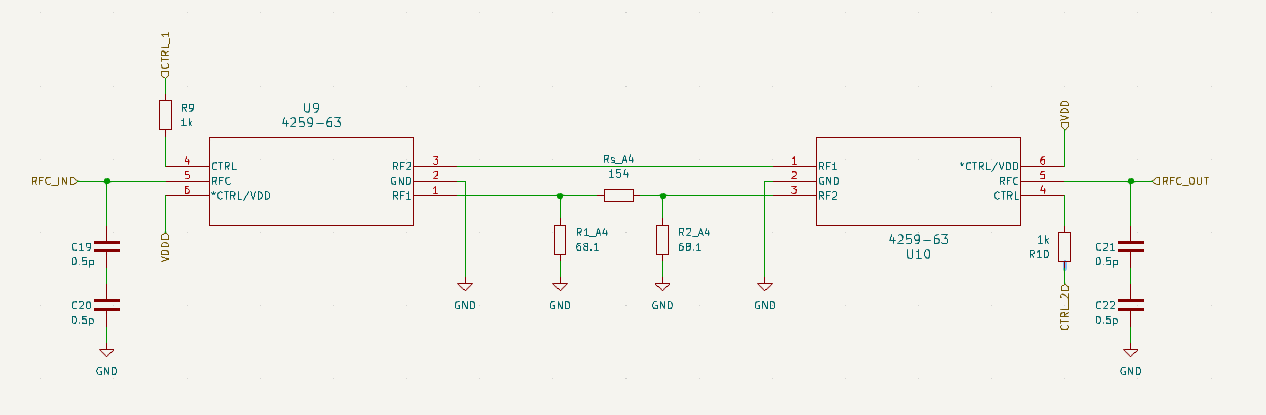

In the image above, we can see that each switch has a CTRL port that we can use to select  RF1 or RF2  for the Output/input of the signal


Before we start with the PCB design, it could be a good idea to take a deeper look at the siwtch's frecuency response, to understand how good it work and if it can affect us.
So if we go back to the datasheet we can  see an Insertion Loss of around 1dB (at 3GHz)

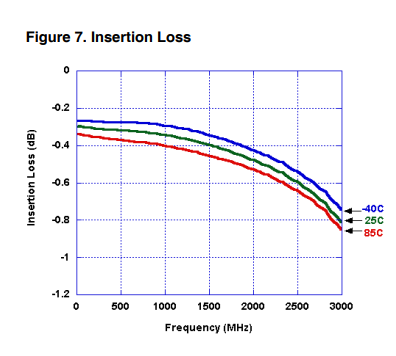

Taking this in consideration, makes sense to simulate the frequency response in Qucs but now, adding the switches at the input and output of the attenuator.



Using the S parameters available in vendors page we can simulate the Frequency response of the switch. 
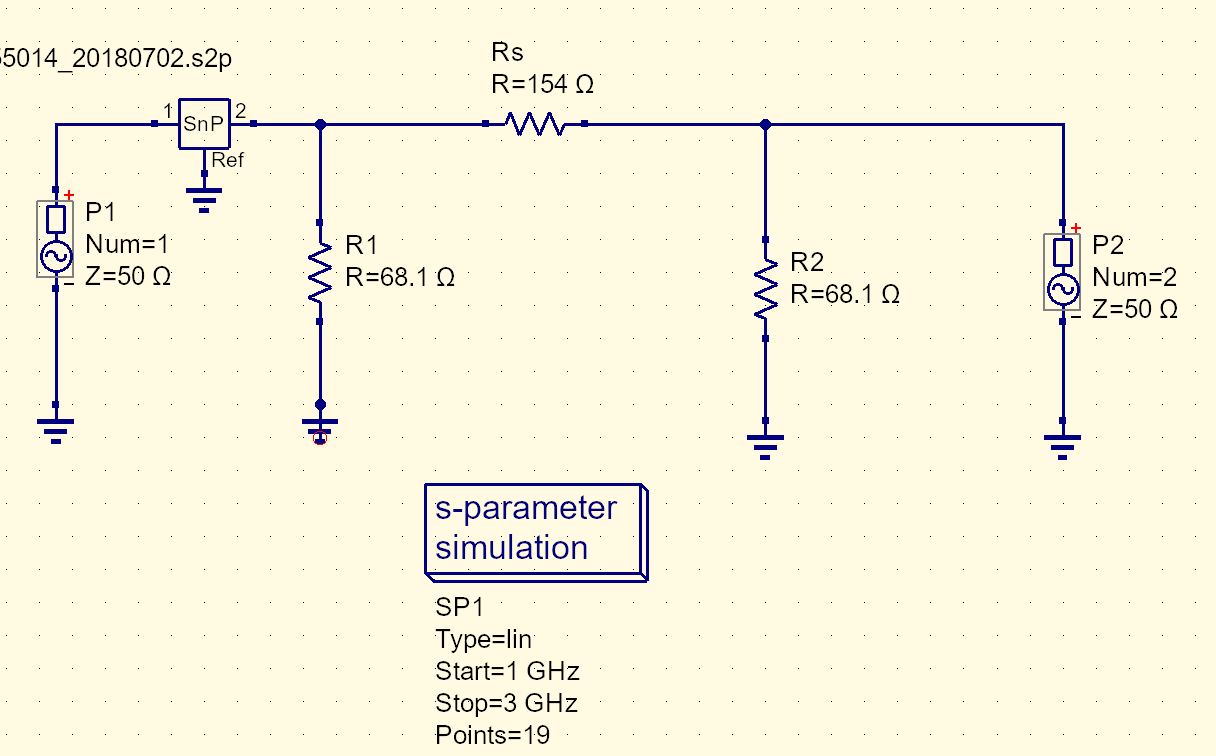



Finally, for the complete schematic, we just need to repeat the attenuator circuit 5 times, changing the values of the resistors

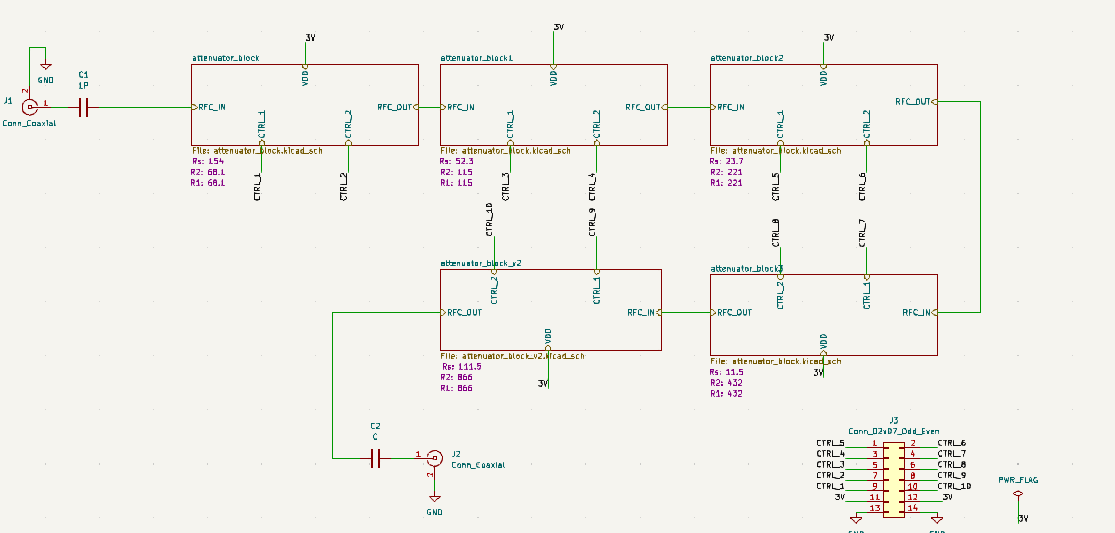

Next decision to be made, before moving to the PCB design, is which type of line should fit better for our circuit, and which is the Weight it should have.

We decided to move foward with coplanar lines because :  
- "With their strong ground structure, GCPW circuits are capable of lower-loss performance at much higher frequencies than microstrip circuits, and offer great potential for designs working well into the millimeter-wave frequency range, even to frequencies of 100 GHz and beyond. "

So, using Kicad calculator and completing the values  (assuming we are using FR4)

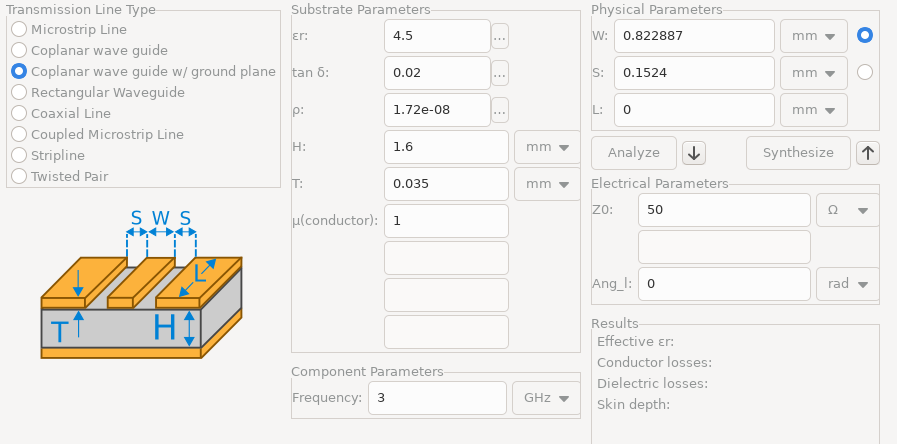

W = 0.8228 --> this is the weight of the line we need to use in all RF connections.



Some other considerations we have made for the pcb design:
- Use a two-layer board, and use the back layer for GND
- Reduce as much as possible the space between RF connections
- Have a GND via as close as possible to every GND connection
- Add vias on both sides of RF line (Ref: https://mpd.southwestmicrowave.com/wp-content/uploads/2018/07/Optimizing-Test-Boards-for-50-GHz-End-Launch-Connectors.pdf)

Final PCB design:

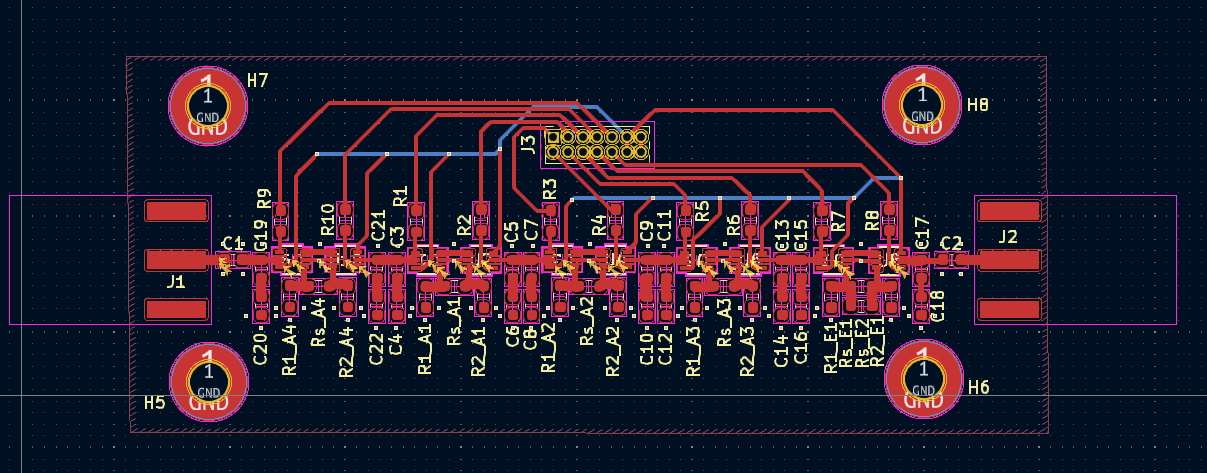

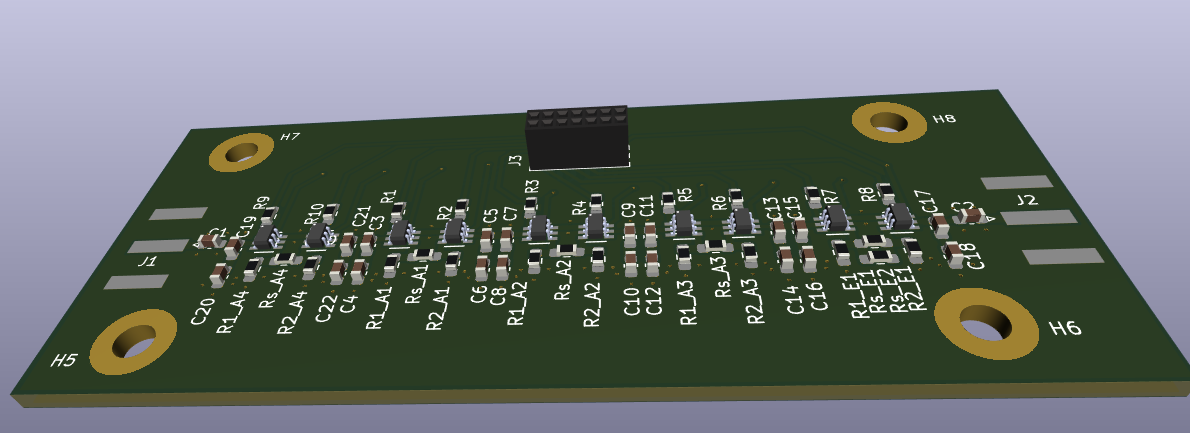